# 1. Information about the submission

## 1.1 Name and number of the assignment 

**Text categorization: argument mining - HW2**



## 1.2 Student name

**Vo Ngoc Bich Uyen**

## 1.3 Codalab user ID

**UyenVo** 

## 1.4 Additional comments

***Enter here** any additional comments which you would like to communicate to a TA who is going to grade this work not related to the content of your submission.*

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology 

### 2.1.1 Dataset

The annotated sentences were divided into three corpora: training, validation, and test.
+ From file train.tsv: training (80%); validation (20%)
+ From file test-no_labels.tsv: test (100%) 

The following classes (labels) were used:
+ “for” = 2
+ “other” = 1
+ “against” = 0
+ "irrelevant" = -1



### 2.1.2 Data processing
+ **remove punctuation** to clean up the data and remove noise;
+ **lowercase words** to eliminate the unnecessary capitalization, which is irrelevant to the meaning of the text;
+ **drop stop words** to reduce the dimensionality of the data;
+ **lemmatize** to reduce each word in the text to its base form, or lemma.
+ **balance the dataset** by using Synthetic Minority Over-sampling Technique (SMOTE). In SMOTE, synthetic samples are generated by interpolating between the minority class samples to create new minority class samples that are different from the original ones.

### 2.1.3 Feature extraction
+ TF-IDF is used for information retrieval. This algorithm calculates the product of two values: term frequency (TF) and inverse document frequency (IDF). The term frequency is the number of times a term appears in a document, while the inverse document frequency is the logarithmically scaled fraction of the number of documents that contain the term to the total number of documents. TF-IDF can be applied to any type of text, including dialogue and social media texts. However, if the dataset contains a large number of misspelled words or informal language, the model's performance may be reduced. It is always important to use appropriate preprocessing techniques, such as removing stopwords, to obtain better results.

+ And, I use DeepPavlov RuBERT Conversational with BERT pooling, which means that the last hidden state of the model is used to generate a single vector that represents the entire sequence. This vector can then be used as a feature representation for a downstream task, such as classification or regression. This is ideally suited for encoding social media comments since it has been pretrained on discussion and social media texts.


## 2.1.4 Modeling


1. Doing a grid search for two models (Support Vector Machines and Logistic Regression) on a training dataset to obtain the best hyperparameters for each model and each output class (masks stance, masks argument, quarantine stance, quarantine argument, vaccines stance, vaccines argument).
2. Training and evaluating models with previously found hyperparameters on the training dataset and returning their predictions on validation data. 
3. Identifying the best preprocessing method and model for each output class based on the F1 macro score, which provides a single score that balances precision and recall. Therefore, it is useful to make decisions about which model to use for each class.
4. Taking the best model and preprocessing method determined to the test data to obtain the final predictions for each output class.

## 2.2 Discussion of results

+ After doing the grid search, I get the following best hyperparameters for each model and each output class: 


Class | TF-IDF |	BERT	| TF-IDF	| BERT
--- | --- | --- | --- | --- 
 |  | **LR**	|  | **SVM**
masks_stance | C = 9, solver: newton-cg |	C = 9, solver: newton-cg	| C = 1, kernel: rbf	| C = 50, kernel: rbf
masks_argument | C = 9, solver: newton-cg |	C = 9, solver: saga	| C = 10, kernel: rbf	| C = 50, kernel: rbf	
quarantine_stance |	C = 5, solver: newton-cg |	C = 9, solver: saga	| C = 10, kernel: rbf	| C = 50, kernel: linear
quarantine_argument |	C = 5, solver: newton-cg |	C = 9, solver: newton-cg	| C = 10, kernel: rbf	| C = 50, kernel: rbf
vaccines_stance |	C = 5, solver: newton-cg |	C = 9, solver: newton-cg	| C = 1, kernel: rbf	| C = 50, kernel: rbf 
vaccines_argument |	C = 5, solver: newton-cg |	C = 9, solver: saga	| C = 10, kernel: linear	| C = 50, kernel: rbf

Table 1

+ Comparing the F1 macro score 

Method_model |masks_stance |	masks_argument |	quarantine_stance	| quarantine_argument	| vaccines_stance	|vaccines_argument 
--- | --- | --- | --- | --- | --- | ---
TF-IDF_LR |	0.544971 |	0.59728	| 0.50243 |	0.446082	| 0.50705 |	0.447381
BERT_LR	| 0.48279 |	0.497485 |	0.509463 |	0.46252 |	0.456419 |	0.414001
TF-IDF_SVM |	0.440353 |	0.359266 | 0.332075 |	0.435118 |	0.500446 |	0.268448
BERT_SVM	| 0.45136 |	0.487706	| 0.444966 |	0.428279 |	0.422336 |	0.357727

Table 2

+ Then making decisions about which model and preprocessing method to use for each output class:

Class | Method | Model
--- | --- | ---
masks_stance| TF-IDF | LR: C = 9, solver: newton-cg
masks_argument| TF-IDF | LR: C = 9, solver: newton-cg
quarantine_stance| BERT | LR: C = 9, solver:saga
quarantine_argument| BERT | LR: C = 9, solver: newton-cg
vaccines_stance| TF-IDF | LR: C = 5, solver: newton-cg
vaccines_argument| TF-IDF | LR: C = 5, solver: newton-cg
|**F1 score** | 0.5080 (stance) // 0.5014 (premises)
 
Table 3
+ This method gets 0.5080 for F1 stance detection and 0.5014 for F1 premises classification in Codalab.

+ Moreover, I tried a different approach (voting), but the result was not significantly improving. This approach assembles predictions from many models that appeared in the best hyperparameters table and uses majority voting. By computing the mode of the predicted values across different models, it can help reduce the likelihood of overfitting and improve the robustness of the final predictions. 

+ First voting: 7 models and methods (I take all possible hyperparameters and processing methods from table 1)

Method | Model 
--- | ---
TF-IDF | LR: C = 5, solver: newton-cg
TF-IDF | LR: C = 9, solver: newton-cg
TF-IDF | SVM: C = 1, kernel: rbf
TF-IDF | SVM: C = 10, kernel: rbf
BERT | LR: C = 9, solver: newton-cg
BERT | LR: C = 9, solver: saga
BERT | SVM: C = 50, kernel: rbf
**F1 score** | 0.5033 (stance) // 0.5031 (premises)
 
+ Second voting: 3 models and methods (There are 4 combinations in table 2 that get F1 scores higher than 0.5 {masks_stance,	masks_argument, quarantine_stance and vaccines_stance}, so I decide to combine these models and methods)

Method | Model 
--- | ---
TF-IDF | LR: C = 5, solver: newton-cg
TF-IDF | LR: C = 9, solver: newton-cg
BERT | LR: C = 9, solver:saga
**F1 score** | 0.5074 (stance) // 0.5027 (premises)

We can see that the quality of the models being added to the ensemble is important. If the added models are underperforming or make errors in similar ways as those already in the ensemble, then more models may not necessarily be better. 

# 3 Code

## 3.1 Requirements

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 3.2 Download the data

In [ ]:
!wget -O train.tsv https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/train.tsv
#!wget -O val_empty.tsv https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/val_empty.tsv
!wget -O test-no_labels.tsv https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/test-no_labels.tsv

--2023-04-22 20:46:27--  https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1539551 (1.5M) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>]   1.47M  --.-KB/s    in 0.01s   

2023-04-22 20:46:27 (119 MB/s) - ‘train.tsv’ saved [1539551/1539551]

--2023-04-22 20:46:27--  https://raw.githubusercontent.com/dialogue-evaluation/RuArg/main/data/test-no_labels.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298180 (291K) [tex

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn
from collections import Counter, OrderedDict
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import json
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from string import punctuation
from itertools import islice 
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import f1_score, accuracy_score
from transformers import AutoTokenizer, AutoModel
nltk.download('stopwords')  
from nltk.corpus import stopwords as nltk_stopwords
from nltk.tokenize import TweetTokenizer
from pymystem3 import Mystem

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 3.3 Preprocessing 

In [ ]:
# Import data from csv
train_df = pd.read_csv('/content/train.tsv', sep='\t')
train_df, val_df = train_test_split(train_df, train_size=0.8, random_state=42)
test_df = pd.read_csv("/content/test-no_labels.tsv", sep="\t")
train_df.head()

,text_id,text,masks_stance,masks_argument,quarantine_stance,quarantine_argument,vaccines_stance,vaccines_argument
2302,22904,"Плюс маска нужна в том случае, если вы сами бо...",2,1,-1,-1,-1,-1
1253,20299,А значение слова локдаун ясно всем.,-1,-1,1,1,-1,-1
6088,32440,"В том-то и дело, что с вакциной всё пока предс...",-1,-1,-1,-1,1,1
5719,31531,"[USER], да после прививки очень много , кто бо...",-1,-1,-1,-1,0,0
3745,26538,"[USER], маска не панацея, и можно кого нибудь ...",1,1,-1,-1,-1,-1


In [ ]:
def preprocessing(texts):
    mystem = Mystem()
    tokenizer = TweetTokenizer()
    stopwords=set(nltk_stopwords.words('russian'))
    result = []

    for i in tqdm(range(len(texts))):
        text = texts[i]
        text = str(text)
        
        # get rid of punctuation
        text = text.lower() # lowercase, standardize
        text = ''.join([x for x in text if x not in punctuation])
        #text = ' '.join([x for x in text.split() if x not in stopwords])
        # lemmatization
        lem = mystem.lemmatize(text)  
        text = ' '.join([x for x in lem if x not in stopwords and x != ' ']).strip()
        result.append(text)
            
    return np.array(result)

In [ ]:
prep_text_dict= {}
prep_text_dict['train'] = preprocessing(train_df['text'].values)
prep_text_dict['val'] = preprocessing(val_df['text'].values)
prep_text_dict['test'] = preprocessing(test_df['text'].values)

  0%|          | 0/5373 [00:00<?, ?it/s]

  0%|          | 0/1344 [00:00<?, ?it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

In [ ]:
# data with classifications and id
org_dict= {}
org_dict['train'] = train_df[[col for col in train_df.columns if 'text' not in col]]
org_dict['val'] = val_df[[col for col in train_df.columns if 'text' not in col]]
org_dict['test'] = test_df[[col for col in train_df.columns if 'text' not in col]]
# data with text and id
text_dict= {}
text_dict['train'] = train_df['text']
text_dict['val'] = val_df['text']
text_dict['test'] = test_df['text']

### Data distribution

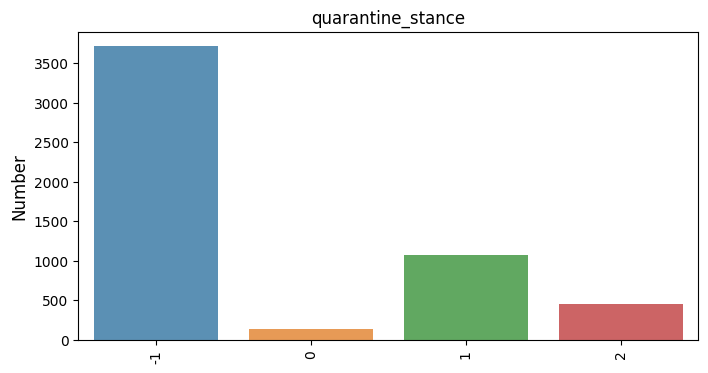

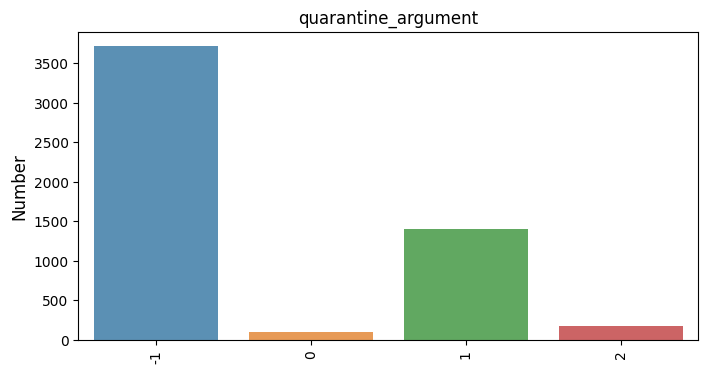

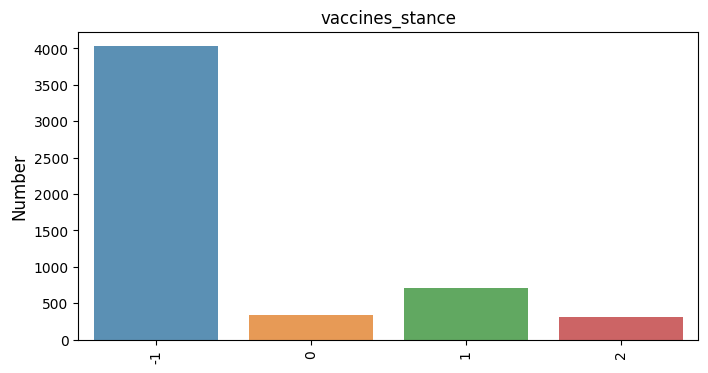

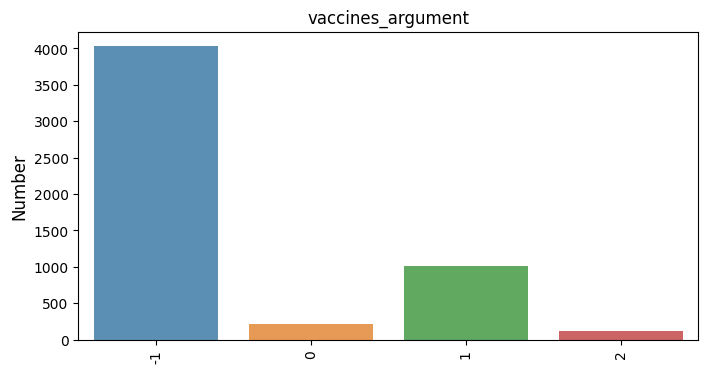

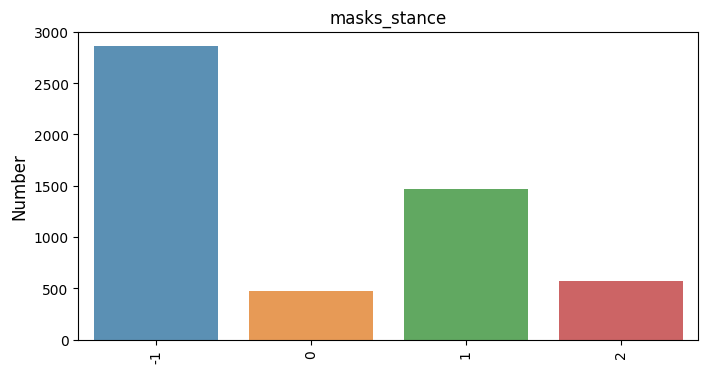

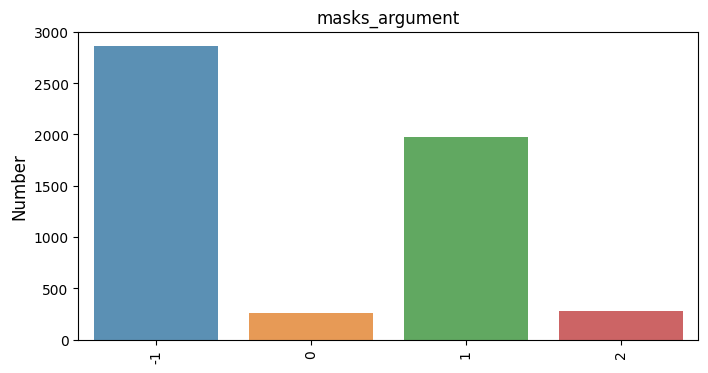

In [ ]:
for class_name in ["quarantine", "vaccines",  "masks"]:
  for case in ['stance', 'argument']:
    count = train_df[f'{class_name}_{case}'].value_counts()
    plt.figure(figsize=(8,4))
    seaborn.barplot(x=count.index, y=count.values, alpha=0.8,)
    plt.ylabel('Number', fontsize=12)
    plt.title(f'{class_name}_{case}')
    plt.xticks(rotation=90)
    plt.show()

### TF-IDF

In [ ]:
text_transformer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, max_features=150000)

split_dict= {}

split_dict['train'] = text_transformer.fit_transform(prep_text_dict['train'])
split_dict['val'] = text_transformer.transform(prep_text_dict['val'])
split_dict['test'] = text_transformer.transform(prep_text_dict['test'])

prep_data = dict()
prep_data['TF-IDF'] = split_dict

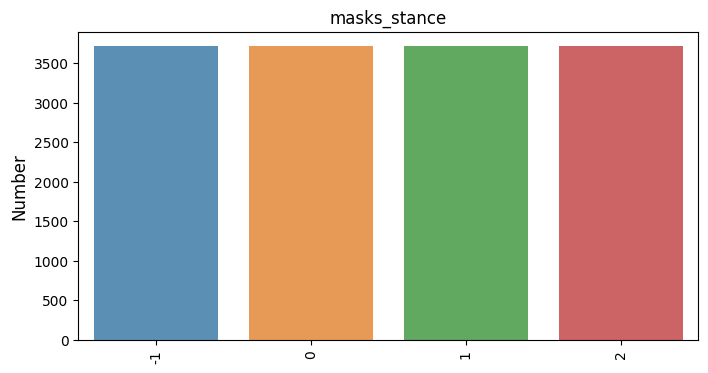

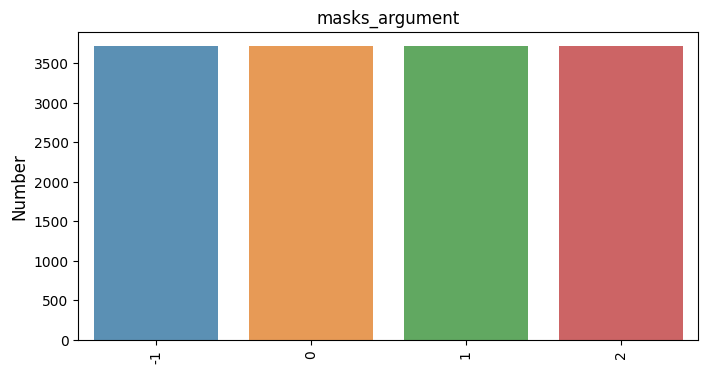

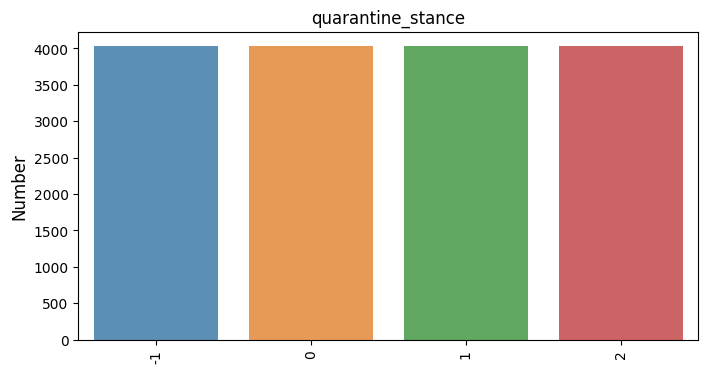

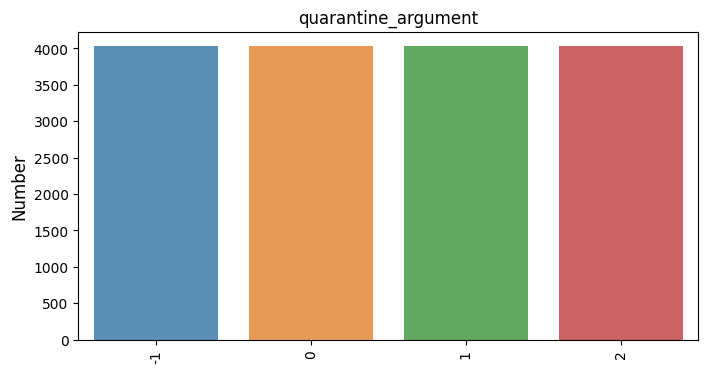

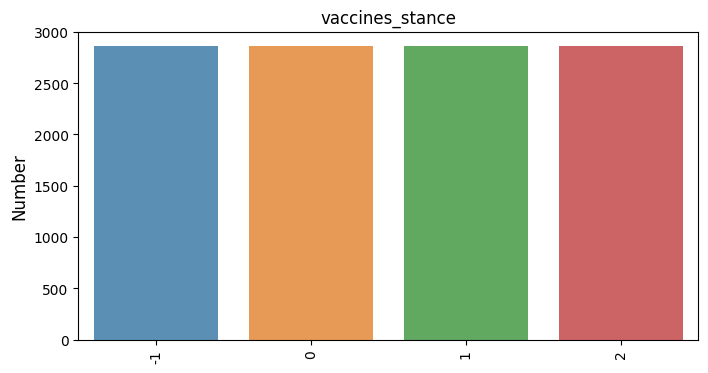

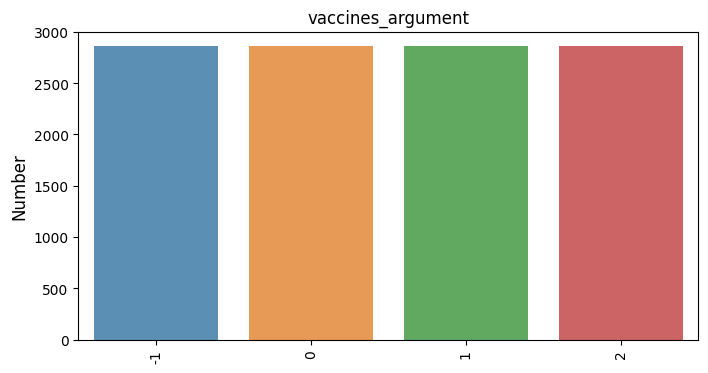

In [ ]:
smote = SMOTE(random_state=42)
cnts = []
names = ['masks_stance','masks_argument','quarantine_stance','quarantine_argument','vaccines_stance','vaccines_argument']

for class_name in ["quarantine", "vaccines",  "masks"]:
    for case in ['stance', 'argument']:
        x, y = smote.fit_resample(split_dict['train'], org_dict['train'][f'{class_name}_{case}'])
        count = y.value_counts()
        cnts.append(count)

for i in range(len(names)):
    cnt = cnts[i]
    name = names[i]
    plt.figure(figsize=(8,4))
    seaborn.barplot(x=cnt.index, y=cnt.values, alpha=0.8)
    plt.ylabel('Number', fontsize=12)
    plt.title(name)
    plt.xticks(rotation=90)
    plt.show()

###BERT

In [ ]:
tokenizer_bert = AutoTokenizer.from_pretrained('DeepPavlov/rubert-base-cased-sentence')
model_bert = AutoModel.from_pretrained('DeepPavlov/rubert-base-cased-sentence')

In [ ]:
def emb_bert(text, model, tokenizer):
    token = tokenizer(text, padding=True, max_length=250, truncation=True, return_tensors='pt')

    with torch.no_grad():
        model_out = model(**{key: value.to(model.device) for key, value in token.items()})

    emb = model_out.last_hidden_state[:, 0, :]
    emb = torch.nn.functional.normalize(emb)

    return emb[0].cpu().numpy()

In [ ]:
emb_dict=dict()

for dataset, texts in prep_text_dict.items():
    res = []
    for text in tqdm(texts):
        pr_text = emb_bert(text, model_bert, tokenizer_bert)
        res.append(pr_text)
    emb_dict[dataset] = np.array(res)
    
prep_data['BERT'] = emb_dict

  0%|          | 0/5373 [00:00<?, ?it/s]

  0%|          | 0/1344 [00:00<?, ?it/s]

  0%|          | 0/1402 [00:00<?, ?it/s]

## 3.4 Modeling 

### 3.4.1 Finding the best hyperparameters for models

In [ ]:
models_dict = {
    'SVM':SVC(random_state=0xC0FFEE),
    'LR':LogisticRegression(random_state=0xC0FFEE)
}

In [ ]:
params_dict = { 
'SVM':{
    'C': [1, 10, 50],
    'kernel': ['linear', 'rbf']
},  
'LR':{
    'C': range(1, 11, 2),
    'solver': ['newton-cg', 'saga']
}
}

In [ ]:
def grid_search(split_dict, models_dict, params_dict):
    smote = SMOTE(random_state=42)
    
    best_params = dict() 
    for model_name in models_dict:
        best_params_l1 = dict()
        print(model_name)
        for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
            best_params_l2 = dict()
            for case in ['stance', 'argument']:
                x, y = smote.fit_resample(split_dict['train'], org_dict['train'][f'{class_name}_{case}'])
                model = models_dict[model_name]
                params_grid = params_dict[model_name]
                grid_model = GridSearchCV(model, param_grid=params_grid, cv=5, n_jobs=1, verbose=0, scoring='f1_weighted')
                grid_model.fit(x, y)
                best_params_l2[case] = grid_model.best_params_
            best_params_l1[class_name] = best_params_l2
        best_params[model_name] = best_params_l1
        
    return best_params

In [ ]:
dict_params = dict()

for pr_method, pr_data in prep_data.items():
    if pr_method not in dict_params.keys():
        split_dict = pr_data
        dict_params[pr_method] = grid_search(split_dict, models_dict, params_dict)
        with open('best_params', 'w') as f:
            f.write(json.dumps(dict_params))

SVM


  0%|          | 0/3 [00:00<?, ?it/s]

LR


  0%|          | 0/3 [00:00<?, ?it/s]

SVM


  0%|          | 0/3 [00:00<?, ?it/s]

LR


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
import pprint
pprint.pprint(dict_params)

{'BERT': {'LR': {'masks': {'argument': {'C': 9, 'solver': 'newton-cg'},
                           'stance': {'C': 9, 'solver': 'saga'}},
                 'quarantine': {'argument': {'C': 9, 'solver': 'saga'},
                                'stance': {'C': 9, 'solver': 'newton-cg'}},
                 'vaccines': {'argument': {'C': 9, 'solver': 'newton-cg'},
                              'stance': {'C': 9, 'solver': 'saga'}}},
          'SVM': {'masks': {'argument': {'C': 50, 'kernel': 'rbf'},
                            'stance': {'C': 50, 'kernel': 'rbf'}},
                  'quarantine': {'argument': {'C': 50, 'kernel': 'rbf'},
                                 'stance': {'C': 50, 'kernel': 'rbf'}},
                  'vaccines': {'argument': {'C': 50, 'kernel': 'rbf'},
                               'stance': {'C': 50, 'kernel': 'rbf'}}}},
 'TF-IDF': {'LR': {'masks': {'argument': {'C': 9, 'solver': 'newton-cg'},
                             'stance': {'C': 9, 'solver': 'newton-cg'}},

### 3.4.2 Predicting and computing f1-score

In [ ]:
df_metrics = pd.DataFrame([], columns = [col for col in train_df.columns if 'text' not in col])
pred_dict1 = dict()
pred_dict2 = dict()

def function(model, first, second):
    if model == 'LR':
      return LogisticRegression(C = first, solver = second, multi_class='multinomial')
    elif model == 'SVM':
      return SVC(C = first, kernel = second)
for pr_method, pr_data in prep_data.items():
  print(pr_method)
  for model_name, models in tqdm(dict_params[pr_method].items()):
    split_dict = pr_data
    val_data = org_dict['val'].copy()
    test_data = org_dict['test'].copy()
    smote = SMOTE(random_state=42)
    for class_name, case_name in models.items():
      for case, subcase in case_name.items():
        x, y = smote.fit_resample(split_dict['train'], train_df[[f'{class_name}_{case}']])
        first, second = islice(subcase.values(), 2) 
        model = function(model_name, first, second)
        model.fit(x, y)
        val_data[f'{class_name}_{case}'] = model.predict(split_dict['val'])
        test_data[f'{class_name}_{case}'] = model.predict(split_dict['test'])
        
    if model_name == 'LR':
      pred_dict1[pr_method] = {model_name: {'val':val_data,'test':test_data}}
    else:
      pred_dict2[pr_method] = {model_name: {'val':val_data,'test':test_data}}

TF-IDF


  0%|          | 0/2 [00:00<?, ?it/s]

BERT


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
df_metrics1 = pd.DataFrame([], columns = [col for col in train_df.columns if 'text' not in col])
for pred_dict in [pred_dict1, pred_dict2]:
  for pr_method, pr_data in pred_dict.items():
    for model_name, model_pred in pr_data.items():
        y_pred_table = pred_dict[pr_method][model_name]['val'].copy()
        for case in ['stance', 'argument']:
            for class_name in ["quarantine", "vaccines",  "masks"]:
                y_true = val_df[f'{class_name}_{case}']
                y_pred = y_pred_table[f'{class_name}_{case}']
                f1 = f1_score(y_true, y_pred, labels=[2, 1, 0], average="macro")
                df_metrics.loc[f'{pr_method}_{model_name}', f'{class_name}_{case}'] = f1

df_metrics    

,masks_stance,masks_argument,quarantine_stance,quarantine_argument,vaccines_stance,vaccines_argument
TF-IDF_LR,0.544971,0.59728,0.50243,0.446082,0.50705,0.447381
BERT_LR,0.48279,0.497485,0.509463,0.46252,0.456419,0.414001
TF-IDF_SVM,0.440353,0.359266,0.332075,0.435118,0.500446,0.268448
BERT_SVM,0.45136,0.487706,0.444966,0.428279,0.422336,0.357727


### 3.4.3 Finding the best model for each class

In [ ]:
best_methods = {col:df_metrics.index[np.argmax(df_metrics[col])] for col in df_metrics.columns}
best_methods = {col:{'method':best.split('_')[0], 'model':best.split('_')[1]} 
                     for col, best in best_methods.items()}
best_methods

{'masks_stance': {'method': 'TF-IDF', 'model': 'LR'},
 'masks_argument': {'method': 'TF-IDF', 'model': 'LR'},
 'quarantine_stance': {'method': 'BERT', 'model': 'LR'},
 'quarantine_argument': {'method': 'BERT', 'model': 'LR'},
 'vaccines_stance': {'method': 'TF-IDF', 'model': 'LR'},
 'vaccines_argument': {'method': 'TF-IDF', 'model': 'LR'}}

### 3.4.4 Result

In [ ]:
result = pd.DataFrame([])
for name, best_dict in best_methods.items():
    if best_dict['model'] == 'LR':
       table = pred_dict1[best_dict['method']]['LR']['test']
    elif best_dict['model'] == 'SVM':
       table = pred_dict2[best_dict['method']]['SVM']['test']
    result[name] = table[name]
    
result.insert(0,'text', text_dict['test'])
result.head()

,text,masks_stance,masks_argument,quarantine_stance,quarantine_argument,vaccines_stance,vaccines_argument
0,Каникулы только дадут почву для распостранения...,-1,-1,1,1,-1,-1
1,"Думал спокойно посидим в небольшой компании, п...",-1,-1,1,1,-1,-1
2,"[USER], в Китае болезнь гуляет с декабря, прос...",-1,-1,1,1,-1,-1
3,если переболела бессимптомно добрая треть насе...,-1,-1,-1,-1,-1,-1
4,А подготовка подразумевает собой массовое скоп...,-1,-1,2,2,-1,-1


In [ ]:
result.to_csv('submit.tsv', index = False, sep='\t')
!zip submit.zip submit.tsv

  adding: submit.tsv (deflated 73%)


### 3.4.5 Voting method

In [ ]:
smote = SMOTE(random_state=42)
res_data = test_df.copy()
for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
    for case in ['stance', 'argument']:
        # TF-IDF
        x1, y1 = smote.fit_resample(prep_data['TF-IDF']['train'], org_dict['train'][f'{class_name}_{case}'])        
        model1 = LogisticRegression(C = 5, solver='newton-cg', multi_class='multinomial')
        model1.fit(x1, y1)
        pred1=model1.predict(prep_data['TF-IDF']['test'])
        model2 = LogisticRegression(C = 9, solver='newton-cg', multi_class='multinomial')
        model2.fit(x1, y1)
        pred2 = model2.predict(prep_data['TF-IDF']['test'])
        model3 = SVC(C = 1, kernel='rbf')
        model3.fit(x1, y1)
        pred3 = model3.predict(prep_data['TF-IDF']['test'])
        model4 = SVC(C = 10, kernel='linear')
        model4.fit(x1, y1)
        pred4 = model4.predict(prep_data['TF-IDF']['test'])
        # BERT
        x2, y2 = smote.fit_resample(prep_data['BERT']['train'], org_dict['train'][f'{class_name}_{case}'])        
        model5 = LogisticRegression(C = 9, solver='newton-cg', multi_class='multinomial')
        model5.fit(x2, y2)
        pred5=model5.predict(prep_data['BERT']['test'])
        model6 = LogisticRegression(C = 9, solver='saga', multi_class='multinomial')
        model6.fit(x2, y2)
        pred6 = model6.predict(prep_data['BERT']['test'])
        model7 = SVC(C = 50, kernel='rbf')
        model7.fit(x2, y2)
        pred7 = model7.predict(prep_data['BERT']['test'])
        arrays = [pred1,pred2,pred3,pred4,pred5,pred6,pred7]
        result = scipy.stats.mode(np.stack(arrays), axis=0)
        final_pred=result.mode[0]
        res_data[f'{class_name}_{case}'] = final_pred

res_data.to_csv('mix.tsv', index = False, sep='\t')
!zip mix.zip mix.tsv

  0%|          | 0/3 [00:00<?, ?it/s]

  adding: mix.tsv (deflated 72%)


In [ ]:
smote = SMOTE(random_state=42)
res_data1 = test_df.copy()
for class_name in tqdm(["quarantine", "vaccines",  "masks"]):
    for case in ['stance', 'argument']:
        x1, y1 = smote.fit_resample(prep_data['TF-IDF']['train'], org_dict['train'][f'{class_name}_{case}'])        
        model1 = LogisticRegression(C = 5, solver='newton-cg', multi_class='multinomial')
        model1.fit(x1, y1)
        pred1=model1.predict(prep_data['TF-IDF']['test'])
        model2 = LogisticRegression(C = 9, solver='newton-cg', multi_class='multinomial')
        model2.fit(x1, y1)
        pred2 = model2.predict(prep_data['TF-IDF']['test'])
        x2, y2 = smote.fit_resample(prep_data['BERT']['train'], org_dict['train'][f'{class_name}_{case}'])        
        model3 = LogisticRegression(C = 9, solver='saga', multi_class='multinomial')
        model3.fit(x2, y2)
        pred3 = model3.predict(prep_data['BERT']['test'])
        arrays = [pred1,pred2,pred3]
        result = scipy.stats.mode(np.stack(arrays), axis=0)
        final_pred=result.mode[0]
        res_data1[f'{class_name}_{case}'] = final_pred

res_data1.to_csv('mix1.tsv', index = False, sep='\t')
!zip mix1.zip mix1.tsv

  0%|          | 0/3 [00:00<?, ?it/s]

  adding: mix1.tsv (deflated 72%)
